#Midterm Exam: Data Visualization and Manipulation

## 00. Instructions

These data represent information about almost every country from the year 2010. The data are taken from the [Fragile States Index](https://fragilestatesindex.org/indicators/), which measures 12 risk factors for the outbreak of violent conflict and the [Targeted Mass Killing (TMK)](https://politicsir.cass.anu.edu.au/about-targeted-mass-killing-dataset) dataset, which tracks mass atrocities performed against specific groups, generally by governments. Check the first link for information about the indicators. The TMK columns were added by your instructors, and indicate:
* **next5** Did a targeted mass killing occur in this country in the next 5 years?
* **next10** Did a targeted mass killing occur in the next 10 years?
* **previous65** Has a targeted mass killing occured from 1946-2010?

In addition:
1. For every data visualization you make, add a proper description on the axes. Even if the variable name isn't terrible, explicitly add them. This is worth 1 point per axis per problem!
2. For each question asking you to make a calculation, you must add a comment or a markdown cell explicitly answering the question. **Python output alone is insufficient.**

## 0. Load Stuff

Load the `pandas`, `matplotib`, `geopandas`, and `seaborn` libraries.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load in the [dataset found at this link](https://raw.githubusercontent.com/Greg-Hallenbeck/class-datasets/main/datasets/fsi-tmk-un.csv) into a variable called `fsi`.

In [ ]:
fsi = pd.read_csv("https://raw.githubusercontent.com/Greg-Hallenbeck/class-datasets/main/datasets/fsi-tmk-un.csv")

## 1. Primarily Data Visualization (31 pts, as noted)



(a) Name:
* 3 columns which are numeric.
* 3 which are categorical.
* Are there any columns which are neither categorical nor numeric? If yes, name one.

(3 pts)

In [ ]:
fsi.dtypes

# 1. Three columns that are numeric are c1, c2, and c3.
# 2. Three columns that are categorical are country,
# 3. None of the columns are neither catergorical or numeric.

,0
Country,object
iso3name,object
region,object
continent,object
year,int64
rank,object
total,float64
c1,float64
c2,float64
c3,float64


(b) Make a histogram showing the range of external intervention present in countries. (2 pts)
* Fill in all of the bins with the color dark green. (1 pt)
* Set the axis limits to 0-10, the full possible range of values. (1 pt)
* Manually set either the bin width or number of bins to something reasonable (1 pt).
* Add an axis label! This is your last reminder! (1 pts)
* Describe any trends or patterns you see (2 pts)

(8 points total)

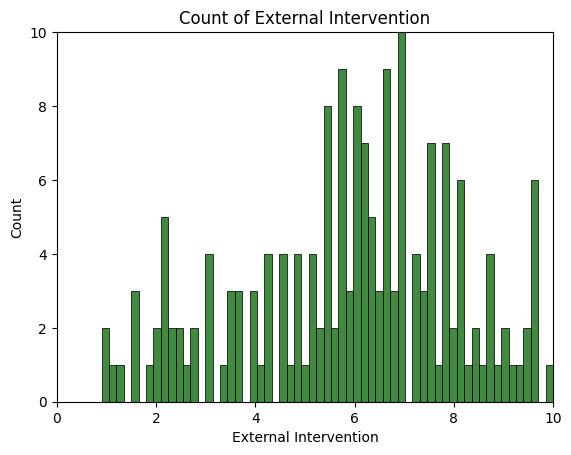

In [ ]:
sns.histplot(fsi, x="x1", color="darkgreen", binwidth = 0.15)
plt.xlim(0,10)
plt.ylim(0,10)
plt.xlabel("External Intervention")
plt.ylabel("Count")
plt.title("Count of External Intervention")
plt.show()

  # A trend I see is that there is the highest count of external intervention between approximately 5 and 7.


(c) Produce a plot:
* Comparing the factionalization of ruling elites and confidence in the legitimacy of the government. (2 pts)
* Color the graph based on whether a targeted mass killing has occurred in the past in that country.
(1 pt) Change the color palette used. (1 pt)
* Adjust the axes to be the full possible range of each rating, 0-10. (1 pt)
* Comment on any trends you see. (2 pts)

(7 pts total)



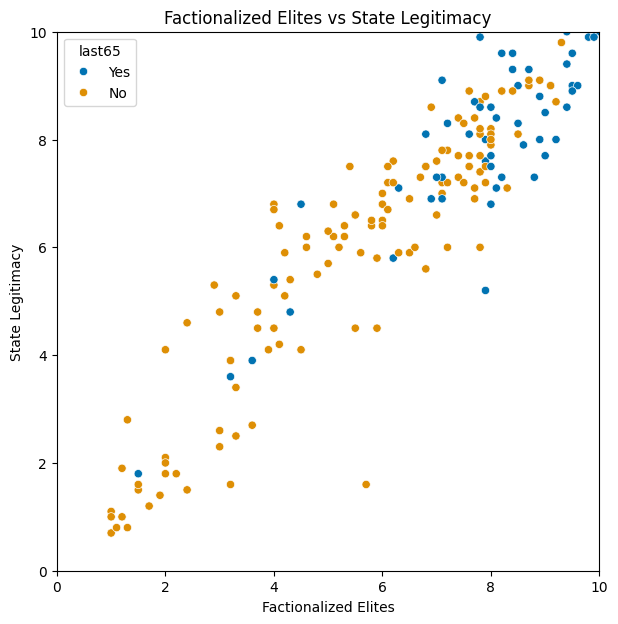

In [ ]:
plt.figure(figsize=(7,7))
sns.scatterplot(fsi, x="c2", y ="p1", hue = "last65", legend = True, palette = "colorblind")
plt.xlabel("Factionalized Elites")
plt.ylabel("State Legitimacy")
plt.title("Factionalized Elites vs State Legitimacy")
plt.xlim(0,10)
plt.ylim(0,10)

plt.show()

# A trend I see is a strong positive corellation between factionalized elites and state legitimacy.
# As the factionalization of ruling elites increases, the confidence in the legitimacy of the state
# ... also increases with it.

(d) Make a plot showing:
* the total stability score (y axis) separated by continent (x axis). (2 pts)
* Color in each box based on what continent it is in, but remove the legend. (2 pt)
* Are there any outliers in this plot? If so, name at least one country which is an outlier. (2 pts)
* Comment on whether some continents seem to have higher or lower overall fragile state scores than others. (3 pts)

(8 pts total)

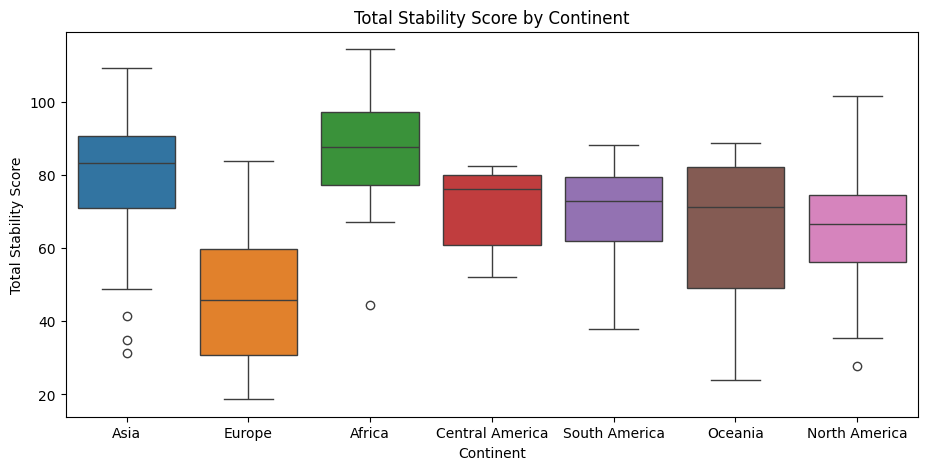

,Country
continent,
Africa,Zimbabwe
Asia,Yemen
Central America,Panama
Europe,United Kingdom
North America,United States
Oceania,Solomon Islands
South America,Venezuela


In [ ]:

plt.figure(figsize=(11,5))
sns.boxplot(fsi, x="continent", y="total", hue="continent", legend = False)
plt.xlabel("Continent")
plt.ylabel("Total Stability Score")
plt.title("Total Stability Score by Continent")
plt.show()

# outliers :
fsi.groupby("continent")["Country"].max()
  # One of the outlier countries that is an outlier is Algeria on the continent Africa.

(e) Make a graph showing:
* How many countries there are in each continent (2 pts)
* What fraction/how many in each continent had and did not have a targeted mass killing event in the 5 years after 2010. (1 pt)
* Comment on the graph. (2 pts)

(5 total points)

ValueError: arange: cannot compute length

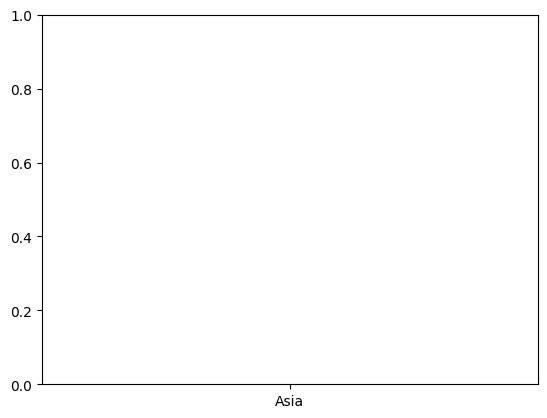

In [ ]:
country_num = fsi["continent"].value_counts()
sns.histplot(fsi, x="continent", y=country_num)
plt.xlabel("Continent Name")
plt.ylabel("Number of Countries in Continent")
plt.title("Number of Countries in each Continent")
plt.show()

## 2. Primarily Data Manipulation (6 @ 5 pts ea = 30 pts)

(a) Show the names, region, and total fragility score for the countries which have all 3 of their cohesion indicator scores at 9+.

In [ ]:
indic = fsi.loc[fsi.c1 >= 9].loc[fsi.c2 >= 9].loc[fsi.c3 >= 9]
indic[["Country","region","total"]]

,Country,region,total
0,Afghanistan,South Asia,109.3
32,Chad,Middle Africa,113.3
76,Iraq,Western Asia,107.3
118,Nigeria,Western Africa,100.2
122,Pakistan,South Asia,102.5
145,Somalia,Eastern Africa,114.3
150,Sudan,Northern Africa,111.8


(b) Create a table showing the average level of external intervention per continent.
* sort this table from highest to lowest value

In [ ]:
avg = fsi.groupby("continent")["x1"].mean().sort_values(ascending = False)
avg

,x1
continent,
Africa,7.213208
Asia,6.434043
Central America,5.744444
Oceania,5.642857
North America,5.590000
South America,5.200000
Europe,3.953846


(c) List the names, region, and total fragility scores of the 3 countries with the 3 highest total scores.

In [ ]:
columns = ["Country","region","total"]
total = fsi[columns].sort_values("total", ascending=False)
total.head(3)

  # Somalia, Chad, and Sudan have the 3 highest total scores

,Country,region,total
145,Somalia,Eastern Africa,114.3
32,Chad,Middle Africa,113.3
150,Sudan,Northern Africa,111.8


(d) What is the highest total score for a country which has not had a targeted mass killing event post-1946? What's the lowest? Print just the country and the total score for each of these.


In [ ]:
ran = fsi.loc[fsi.last65 == "No"].sort_values("total", ascending=False)


print(ran[["Country","total"]].min())
print(ran[["Country","total"]].max())

# The highest total score for a country which has not had a targeted mass killing post-1946 is Zambia, while the
# ... lowest total score for a country which has not had a targeted mass killing post-1946 is Albania.

Country    Albania
total         18.7
dtype: object
Country    Zambia
total       105.0
dtype: object


(e) Find:
* How many countries have an Economic decline score above 5?
* What is their average fragility score?
* How does this compare to the average fragility score of lower economic decline score countries?

Then explain the answer, in text.

In [ ]:
econ_dec = fsi.loc[fsi.e1 >= 5].count()
econ_dec[["Country"]]
  # 131 Countries have an economic decline score above 5

,0
Country,131


In [ ]:
econ_dec_above = fsi.loc[fsi.e1 > 5]
print(econ_dec_above["total"].mean())
econ_dec_below = fsi.loc[fsi.e1 <= 5]
print(econ_dec_below["total"].mean())

  # The average fragility score of countries that have an economic decline score above 5 is about 82, more specifically it is 82.34677419354838
  # The average fragility score of countries that have an economic decline score at or below 5 is about 47, more specifically it is 47.37169811320756

  # Clearly, the average fragility score of countries that have an economic decline score above 5 is significantly higher than those
  # ... of an economic decline score of below 5

82.34677419354838
47.37169811320756


(f) Create an indicator column for whether a country has an economic decline above 5.
  * create a summary table based on if the country is considered to be in economic decline.



In [ ]:
fsi["economic_decline_above_5"] = fsi["e1"]>5

summary = fsi[["Country","economic_decline_above_5"]]
summary

  # The "economic decline above 5" column in the summary table below will be marked as "True" for the countries whose
  # ... economic decline value is greater than 5, and marked "False" for the countries whose
  #... economic decline value is equal to or below 5.

,Country,economic_decline_above_5
0,Afghanistan,True
1,Albania,True
2,Algeria,True
3,Angola,False
4,Antigua and Barbuda,True
...,...,...
172,Venezuela,True
173,Vietnam,True
174,Yemen,True
175,Zambia,True


## 3.Mapping (2 @ 7 pts ea = 14 pts)

Load in the "world boundaries" data.

In [ ]:
world=gpd.read_file("https://github.com/Greg-Hallenbeck/class-datasets/raw/refs/heads/main/mapping/world-administrative-boundaries.zip")

Merge this data with the fsi data using the `pd.merge()` function.

In [ ]:
mapping_data = pd.merge(fsi, world[["name","geometry"]], how = "left", left_on = "Country", right_on = "name")

Convert the mapping_data into a GeoDataFrame, where `geometry=geometry`

In [ ]:
merged_data=gpd.GeoDataFrame(mapping_data,geometry="geometry")

(a) Make a map featuring the following

*  a figure size of 10,10
*  A boundary map of the world data, with a black outline
*  The merged data shown by the total fragile score
*  Use a color map or theme that is not the default.
*  A legend and a label.



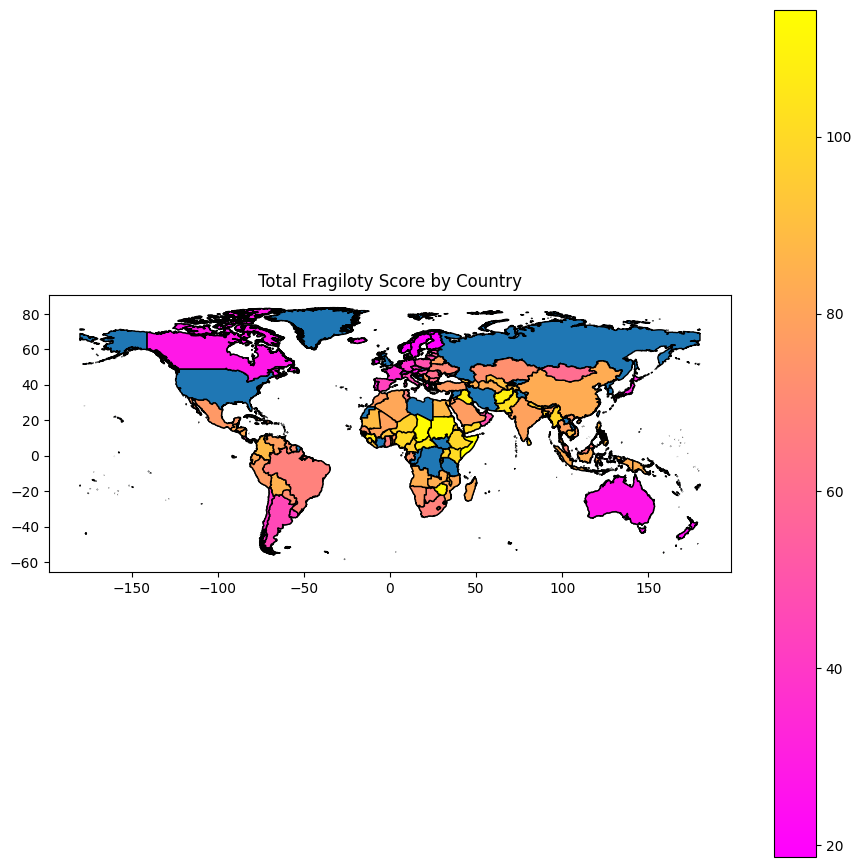

In [ ]:
xmin, ymin, xmax, ymax = -150, -100, 200, 120
fig, ax = plt.subplots(figsize=(11,11))
world.plot(ax=ax, edgecolor = "black")
merged_data.plot(column="total", ax=ax, cmap = "spring", legend=True)
plt.title("Total Fragiloty Score by Country")
plt.show()

(b) Does this map accurately reflect the total fragility scores of all countries?
* How could this map be misleading in it's intentions?
* What would be the next steps to better this map?

No, the map does not accurately reflect the total fragility scores of all the countries. For instance the United States is a blue/dark grey color, but that color is not on the legend so there is no way for viewers to understand what they are looking at, and this is true for several other countries. The map could be misleading in its intentions because some of the countries are similar, but not the same in color, so it can be confusing to view. The tick marks are also every 20 for the score. So, the map can be improved by using more distinct colors, fixing the blue/grey countries so that they are interpretable, and adding more ticks to the legend.

## 4. Data Ethics (25 pts total, as marked)

Carefully read [this article about Uber and self-driving cars](https://www.sfchronicle.com/opinion/openforum/article/robotaxi-car-technology-traffic-18362647.php) (there is also a copy of the article in PDF format in the midterm assignment on Brightspace. For the purposes of this question we are interrograting the power structure and potential issues surrounding "robotaxis," that is, self-driving taxis.

 These are short answer questions, not essays. Be clear and concise; answers in the form of bulleted lists are good. Long answers that are correct but contain far too much information may be penalized.

Please answer using the markdown/text cells in Google Colaboratory.

(a) Name two different ethical standards which are at stake in this particular article. Explain briefly. (4 pts)

- One of the ethical issues within the article is the 69% increase in carbon dioxide that ride sharing has caused. Uber pool, an option on the Uber app that allows riders to share a car if they are going in the same general direction as a stranger, is so cheap and more convenient than walking and public transport that it has increased the amount of people travelling in cars.
- Another ethical issue is the amount of money that robotaxis are able to generate for the government due to the extreme increase in ride sharing. Due to the amount of profit being made, the government and creators of the robotaxis would most likely find it very difficult to overlook the ethical issues of increase in carbon dioxide which is terrible for the environment, as well as other issues that may arrise.

(b) Name at least three stakeholders in this scenario and how each stands to benefit or suffer from the deploying of robotaxis--at least one of these groups must stand to lose *something*. (6 pts)

- One of the stakeholders is the general public who takes part in robotaxis and ride sharing such as Uber Pool. Currently riders are benefitting from the cheap prices and convenience, but eventually there could be more traffic than there was before because people are switching from walking and public transport to ride sharing.
- Another stakeholder is John Rossant from the article. He focuses his media and content on the future of mobility. He stands to benefit from the deploying of robotaxis because it gives him more content to bring awareness to through his media outlets which will more than likely benefit him financially and support his personal image.
- As someone who's main mode of transportation is my own car, I am also a stakeholder. In the future, robotaxis may cause so much traffic that I will be forced to use other modes of transportation that are less convenient for me. On the other hand, with so many more vehicles on the road, there is the possibility of lower prices for public transportation and higher gas prices.

(c) Reference two (and only two) of the domains of the matrix of domination outcomes of this this action could reinforce on groups being marginalized. Explain how. (4 pts)

- A persons economic class could effect the way robotaxis are utilized. People of a higher financial class could potentially find a way to pay more for robotaxis in order to take another person's spot in a car. This could then lead to robotaxi prices going up and people having to resort back to walking and public transport, while those who are wealthier fill all of the seats in the robotaxis.
- Applications such as uber often require profile photos on both the driver and rider profiles. If robotaxi were to require something of this sort, it may lead to drivers discriminating against certain racial groups or genders based on bias. This could become prevalent very quickly and cause these groups to be marginalized.

(d) Propose alternative actions to deploying robotaxis. Choose to consider *either* a legal perspective (what lawmakers could do) or a business perspective (what the tech companies could do), but not both.

From a business perspective, I believe the best alternative to robotaxis would be public transporation such as trains and busses. Cities such as NYC have subway systems that run through the same stations very often and have many routes to chose from to reach your destination. Public transportation is for the most part affordable and much better for the environment than having hundreds of robotaxis driving around releasing gas into the air. On top of this, they'd still be bringing in profit for the government and for companies who run ads on public transportation, and leave more jobs open for people to work jobs in public transport.  

(e) Using a utilitarian, virtue, and/or justice ethics, argue what the best course of action is

The article states that there were several unexpected outcomes of Uberpool, mainly being the carbon dioxide levels increasing 69%, and increase in traffic levels. So, I personally think that robotaxis are not something I would support. This data has been collected after only a few years of ride sharing being an option, so I highly doubt the situation will get better any time soon, and will probably cause more harm than good for the general public.

# Academic Integrity Statement

By writing my name in the cell below, I certify that:

1. I did not use resources other than:
   * the Python notebooks provided by the instructor,
   * links provided in this notebook,
   * the assigned readings, and
   * my own personal notes
2. This means that I did not:
   * look up anything on Google, or Stack Overflow, Chatgpt, &c.,
   * discuss the content of the exam with *anyone* other than the instructors or TAs, or
   * do anything that technically doen't break these rules but is against their spirit.

In [ ]:
# Emma Sainovic